In [6]:
import requests

market = "BTCUSDT"
tick_interval = "1h"

url = f"https://api.binance.com/api/v3/klines?symbol={market}&interval={tick_interval}"
data = requests.get(url).json()


In [8]:
from binance.client import Client
import pandas as pd

client = Client()
candles = client.get_klines(symbol="BTCUSDT", interval=Client.KLINE_INTERVAL_30MINUTE)

cd = pd.DataFrame(candles)
cd.columns = [
    "Open time",
    "Open",
    "High",
    "Low",
    "Close",
    "Volume",
    "Close time",
    "Quote asset volume",
    "Number of trades",
    "Taker buy base asset volume",
    "Taker buy quote asset volume",
    "Can be ignored",
]

cd


,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Can be ignored
0,1650679200000,39608.78000000,39611.31000000,39466.83000000,39520.01000000,424.37470000,1650680999999,16768809.08197150,14643,156.59937000,6187501.13478790,0
1,1650681000000,39520.01000000,39554.97000000,39429.31000000,39495.49000000,277.46530000,1650682799999,10959266.72360160,17756,126.06871000,4979044.55803240,0
2,1650682800000,39495.48000000,39553.01000000,39449.19000000,39461.08000000,426.32483000,1650684599999,16838258.17345020,18303,235.96231000,9319559.46365040,0
3,1650684600000,39461.07000000,39528.47000000,39406.25000000,39463.02000000,391.39169000,1650686399999,15445014.99564070,18517,182.56447000,7204311.36447590,0
4,1650686400000,39463.01000000,39567.60000000,39285.00000000,39384.96000000,800.24522000,1650688199999,31540762.91108910,24966,383.82613000,15133562.11440120,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1651570200000,38506.45000000,38568.69000000,38440.42000000,38454.54000000,450.90900000,1651571999999,17357020.52943770,13352,183.63979000,7068452.82866760,0
496,1651572000000,38454.55000000,38475.03000000,38390.92000000,38447.44000000,517.10321000,1651573799999,19880227.16835480,16918,240.04770000,9228678.40178600,0
497,1651573800000,38447.43000000,38457.44000000,38363.63000000,38421.33000000,496.35132000,1651575599999,19068092.00307430,15415,226.52214000,8701550.94227480,0
498,1651575600000,38421.33000000,38476.90000000,38261.16000000,38465.54000000,1462.00962000,1651577399999,56069782.77556480,29408,927.70473000,35563347.99602580,0


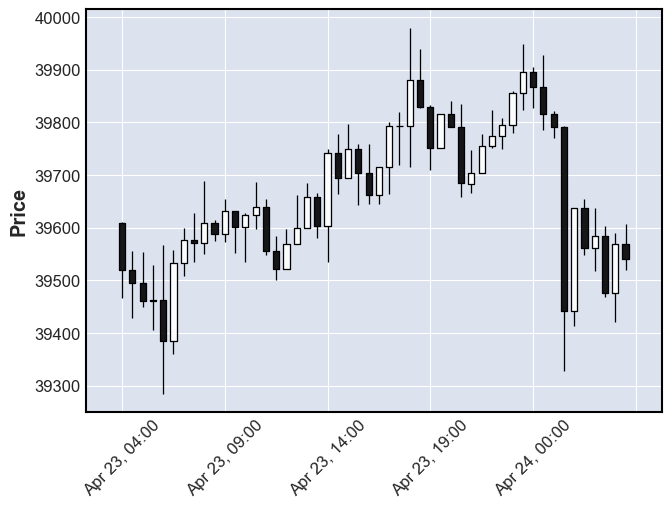

In [41]:
import mplfinance as mpf
from datetime import datetime

chart_data = cd[["Open time", "Open", "High", "Low", "Close", "Volume"]]
chart_data = chart_data.rename(columns={"Open time": "Date"})
chart_data = chart_data.astype({"Open": float, "High": float, "Low": float, "Close": float, "Volume": float})

for i in chart_data.index:
    chart_data.at[i, "Date"] = datetime.fromtimestamp(
        chart_data.at[i, "Date"] / 1000
    )

chart_data
chart_data.index = pd.DatetimeIndex(chart_data['Date'])
mpf.plot(chart_data.head(50), type="candle")